# Web Scraping

I decided to scrape some Amazone Reviews on one of my favorite books "King of Scars" by Leigh Bardugo. I will be using Selenium and BeautifulSoup libraries to parse a website.

In [1]:
import pandas as pd
import io
import os
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
import time

In [47]:
path = r'C:\\Users\\Admin\\Desktop\\amazon\\'

# Initialize the WebDriver
service = Service()
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)

# Loop through all 50 pages
for i in range(1, 51):
    url = 'https://www.amazon.com/King-Scars-Duology/product-reviews/1250618975/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=' + str(i)
    driver.get(url)
    time.sleep(1)
    html = driver.page_source 
    soup = BeautifulSoup(html, 'html.parser')
    
    # Save all 50 files in your path
    file_path = os.path.join(path, "amazon_page_" + str(i) + ".html")
    with io.open(file_path, "w", encoding="utf-8") as f:
        f.write(html)

# Quit the WebDriver after the loop
driver.quit()

# Open the first saved HTML page
file_path = os.path.join(path, "amazon_page_1.html")
with open(file_path, 'r', encoding='utf-8') as file:
    # Read the content of the file
    content = file.read()
    #print(content)

soup = BeautifulSoup(content, 'html.parser')
# Find all elements with the specified class "a-size-base review-text review-text-content"
review_elements = soup.find_all('span', class_='a-size-base review-text review-text-content')

# Process and print the text content of each review element
for idx, review_element in enumerate(review_elements, 1):
    review_text = review_element.get_text()
    #print(f"Review {idx}:")
    #print(review_text)
    #print("-" * 50)

# Create empty lists to store the reviews and ratings separately
rev = []
ratings = []

# Loop through all 50 pages
for i in range(1, 51):
    # Open the saved HTML page
    file_path = os.path.join(path, 'amazon_page_' + str(i) + '.html')
    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')

        # Find the reviews and ratings
        review_elements = soup.find_all('span', {'class': 'a-size-base review-text review-text-content'})
        rating_elements = soup.find_all('span', {'class': 'a-icon-alt'})

        # Process and append reviews and ratings to the lists
        if review_elements and rating_elements:
            for review_element, rating_element in zip(review_elements, rating_elements):
                rev.append(review_element.get_text())
                ratings.append(rating_element.get_text())  # Corrected variable name here
        else:
            rev.append('-1')
            ratings.append('-1')

# Create the DataFrame with the extracted reviews and ratings
final_df = pd.DataFrame({'Reviews': rev, 'Ratings': ratings})

# Print the collected reviews and ratings (optional)
#for idx, (review_text, rating_text) in enumerate(zip(rev, ratings), 1):
    #print(f"Review {idx}:")
    #print("Rating:", rating_text)
    #print("Review:", review_text)
    #print("-" * 50)

In [5]:
# Display the final DataFrame
final_df

,Reviews,Ratings
0,\nKing of Scars by Leigh Bardugo is a breathta...,4.6 out of 5 stars
1,\nKing Nikolai is fighting the monster within ...,5.0 out of 5 stars
2,\nKing of Scars is book six in Leigh Bardugo's...,3.0 out of 5 stars
3,\nI loved the concept of this book— I adore Ni...,5.0 out of 5 stars
4,\nBy far her best work . Extremely well crafte...,5.0 out of 5 stars
...,...,...
135,-1,-1
136,-1,-1
137,-1,-1
138,-1,-1


# Data Cleaning

In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  140 non-null    object
 1   Ratings  140 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [7]:
final_df.describe()

,Reviews,Ratings
count,140,140
unique,101,6
top,-1,-1
freq,40,40


In [13]:
# Count the occurrences of '-1' in the 'Reviews' column
count_negative_reviews = (final_df['Reviews'] == '-1').sum()

# Print the count of rows with '-1' in the 'Reviews' column
print("Number of rows with '-1' in 'Reviews':", count_negative_reviews) #it used to be 40, after dropping those rows we have 0

Number of rows with '-1' in 'Reviews': 0


In [16]:
# Drop the rows with '-1' in the 'Reviews' column
final_df = final_df[final_df['Reviews'] != '-1']

In [18]:
# Strip the rating values to only include the numeric part (e.g., "4.6" from "4.6 out of 5 stars")
final_df.loc[:, 'Ratings'] = final_df['Ratings'].str.replace(' out of 5 stars', '', regex=False)

# Display the final DataFrame after dropping rows with '-1' and stripping the rating values
final_df

,Reviews,Ratings
0,\nKing of Scars by Leigh Bardugo is a breathta...,4.6
1,\nKing Nikolai is fighting the monster within ...,5.0
2,\nKing of Scars is book six in Leigh Bardugo's...,3.0
3,\nI loved the concept of this book— I adore Ni...,5.0
4,\nBy far her best work . Extremely well crafte...,5.0
5,"\n5 biased ⭐️ 😁This book is the epitome of a ""...",4.0
6,\nAbsolutely loved this book after reading the...,4.0
7,"\nSo here’s the thing about “King of Scars”, i...",5.0
8,\nI have been so hyped for this book ever sinc...,5.0
9,"\nReally enjoyed this - easy, fantasy fiction.\n",5.0


In [19]:
# Convert the data type of the 'Ratings' column from object to float
final_df['Ratings'] = final_df['Ratings'].astype(float)

# Optional: Check the data types of the DataFrame columns
final_df.dtypes


Reviews     object
Ratings    float64
dtype: object

# Sentiment Analysis

In [21]:
import matplotlib.pyplot as plt

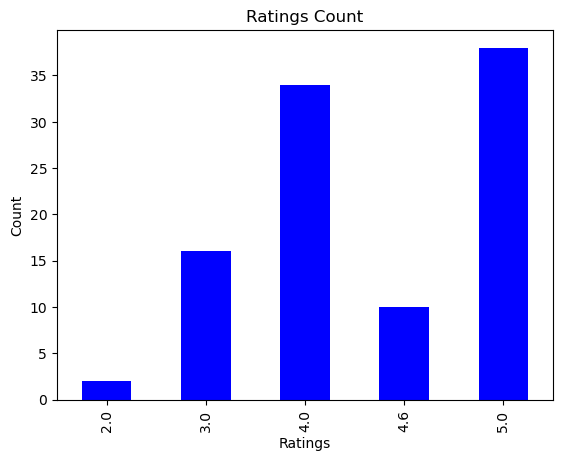

In [22]:
# Create a bar plot for ratings count
ratings_counts = final_df['Ratings'].value_counts().sort_index()
ratings_counts.plot(kind='bar', color='blue')

# Set plot title and labels
plt.title('Ratings Count')
plt.xlabel('Ratings')
plt.ylabel('Count')

# Show the plot
plt.show()

# Wordcloud

In [25]:
import nltk
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

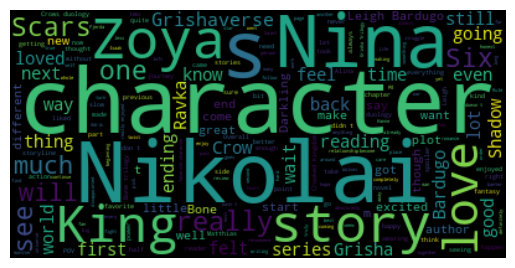

In [29]:
# Create stopword list:
stopwords = set(STOPWORDS)
# Add any additional stopwords specific to your project
stopwords.update(["br", "href", "book","books","read"])

# Combine all reviews into a single text
text = " ".join(review for review in final_df['Reviews'] if review is not np.nan)

# Create the word cloud
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png')
plt.show()

# Classification

In [30]:
# Create a new column 'sentiment' based on the 'Ratings' column
final_df['sentiment'] = final_df['Ratings'].apply(lambda rating: 'positive' if rating > 3 else ('negative' if rating < 3 else 'neutral'))

In [31]:
final_df

,Reviews,Ratings,sentiment
0,\nKing of Scars by Leigh Bardugo is a breathta...,4.6,positive
1,\nKing Nikolai is fighting the monster within ...,5.0,positive
2,\nKing of Scars is book six in Leigh Bardugo's...,3.0,neutral
3,\nI loved the concept of this book— I adore Ni...,5.0,positive
4,\nBy far her best work . Extremely well crafte...,5.0,positive
5,"\n5 biased ⭐️ 😁This book is the epitome of a ""...",4.0,positive
6,\nAbsolutely loved this book after reading the...,4.0,positive
7,"\nSo here’s the thing about “King of Scars”, i...",5.0,positive
8,\nI have been so hyped for this book ever sinc...,5.0,positive
9,"\nReally enjoyed this - easy, fantasy fiction.\n",5.0,positive


In [33]:
# split df - positive and negative sentiment:
positive = final_df[final_df['sentiment'] == 'positive']
negative = final_df[final_df['sentiment'] == 'negative']

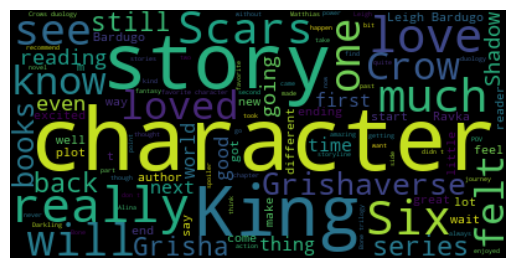

In [43]:
# Wordcloud — Positive Sentiment
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "book", "read", "Nikolai", "Zoya", "Nina", 'S']) 
pos = " ".join(review for review in positive.Reviews) 
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

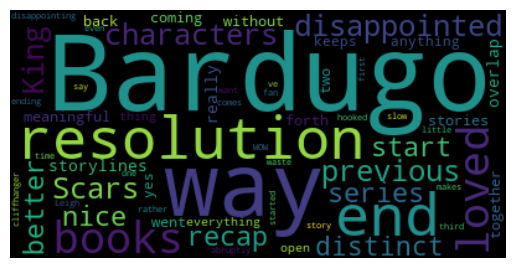

In [44]:
# Wordcloud — Negative Sentiment
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "book", "read", "Nikolai", "Zoya", "Nina", 'S']) 
pos = " ".join(review for review in negative.Reviews) 
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()